In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


170498071/170498071 [==============================] - 2s 0us/step


In [8]:
# Print basic dataset information
print("Number of training images:", len(x_train))
print("Number of test images:", len(x_test))
print("Image shape:", x_train.shape[1:])
print("Number of classes:", len(set(y_train.flatten())))
print("Class names:", tf.keras.utils.to_categorical(y_train).shape)

Number of training images: 50000
Number of test images: 10000
Image shape: (32, 32, 3)
Number of classes: 2
Class names: (50000, 10, 2)


In [16]:
# Define function to display images with labels
import matplotlib.pyplot as plt
def show_images(images, labels):
  plt.figure(figsize=(10, 10))
  for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].reshape((32, 32, 3)))
    plt.title(f"Label: {tf.keras.utils.to_categorical(labels)[i].argmax()}")
    plt.axis('off')
  plt.show()

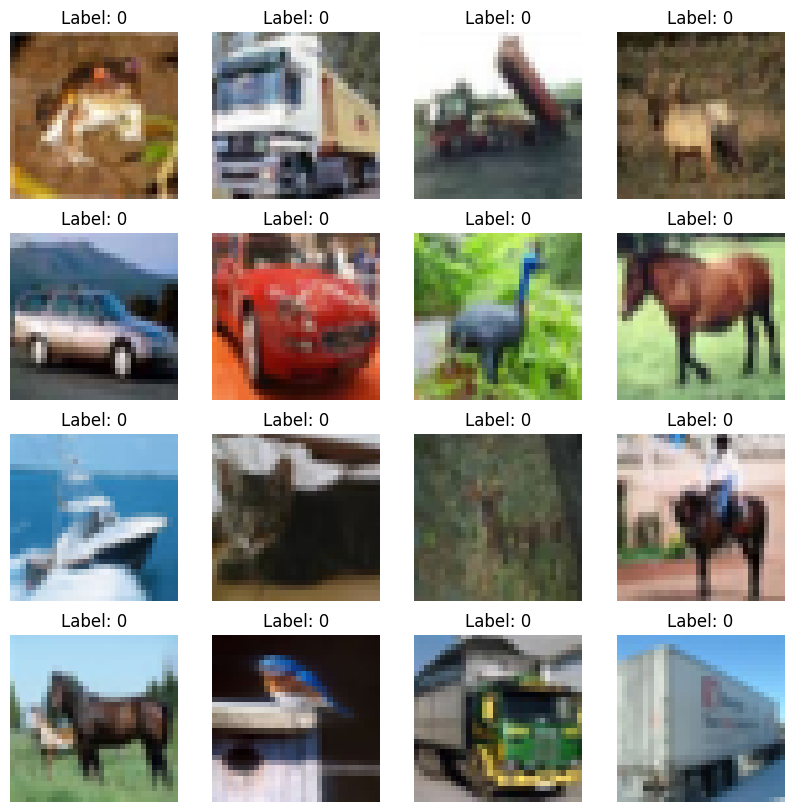

In [17]:
# Display 16 random images from training set
show_images(x_train[:16], y_train[:16])

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(10, activation='softmax')
])

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=16,
          epochs=20,
          validation_data=(x_test, y_test))


Epoch 1/20
3125/3125 [==============================] - 47s 15ms/step - loss: 0.8467 - accuracy: 0.6880 - val_loss: 0.9494 - val_accuracy: 0.6947
Epoch 2/20
3125/3125 [==============================] - 43s 14ms/step - loss: 0.8183 - accuracy: 0.7004 - val_loss: 0.9810 - val_accuracy: 0.6803
Epoch 3/20
3125/3125 [==============================] - 43s 14ms/step - loss: 0.8121 - accuracy: 0.7017 - val_loss: 0.9826 - val_accuracy: 0.6944
Epoch 4/20
3125/3125 [==============================] - 44s 14ms/step - loss: 0.7995 - accuracy: 0.7058 - val_loss: 0.9672 - val_accuracy: 0.6905
Epoch 5/20
3125/3125 [==============================] - 46s 15ms/step - loss: 0.7997 - accuracy: 0.7032 - val_loss: 0.9468 - val_accuracy: 0.6903
Epoch 6/20
3125/3125 [==============================] - 43s 14ms/step - loss: 0.7855 - accuracy: 0.7081 - val_loss: 0.9398 - val_accuracy: 0.6956
Epoch 7/20
3125/3125 [==============================] - 45s 14ms/step - loss: 0.7906 - accuracy: 0.7080 - val_loss: 0.9590 -

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.9847 - accuracy: 0.6988
Test accuracy: 0.6988000273704529
